The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
n region 19
n cells in triangle: 406
mean regions at raster cell 2.5098522167487687
unique_reg_id_combs_in_raster_cells {(0,): [(1, 1), (2, 1)], (0, 6006): [(2, 2)], (0, 5005): [(3, 1)], (0, 5005, 6006): [(3, 2), (4, 2)], (0, 6006, 16022): [(3, 3), (4, 3)], (0, 4004, 5005): [(4, 1)], (6006, 15021, 16022): [(4, 4)], (0, 4004, 5005, 9010): [(5, 1)], (0, 5005, 6006, 9010): [(5, 2)], (0, 6006, 9010, 16022): [(5, 3)], (6006, 9010, 15021, 16022): [(5, 4)], (6006, 9010, 15021, 19026): [(5, 5)], (0, 4004, 5005, 8009, 9010): [(6, 1), (7, 1), (8, 1), (9, 1)], (0, 5005, 6006, 8009, 9010): [(6, 2), (7, 2), (8, 2), (9, 2)], (0, 6006, 8009, 9010, 16022): [(6, 3), (7, 3), (8, 3), (9, 3)], (6006, 8009, 9010, 15021, 16022): [(6, 4), (7, 4), (8, 4), (9, 4)], (6006, 8009, 9010, 15021, 19026): [(6, 5), (7, 5), (8, 5), (9, 5)], (6006, 8009, 9010, 18025, 19026): [(6, 6), (7, 6), (8, 6), (9, 6)], (6006, 9010, 18025, 19026

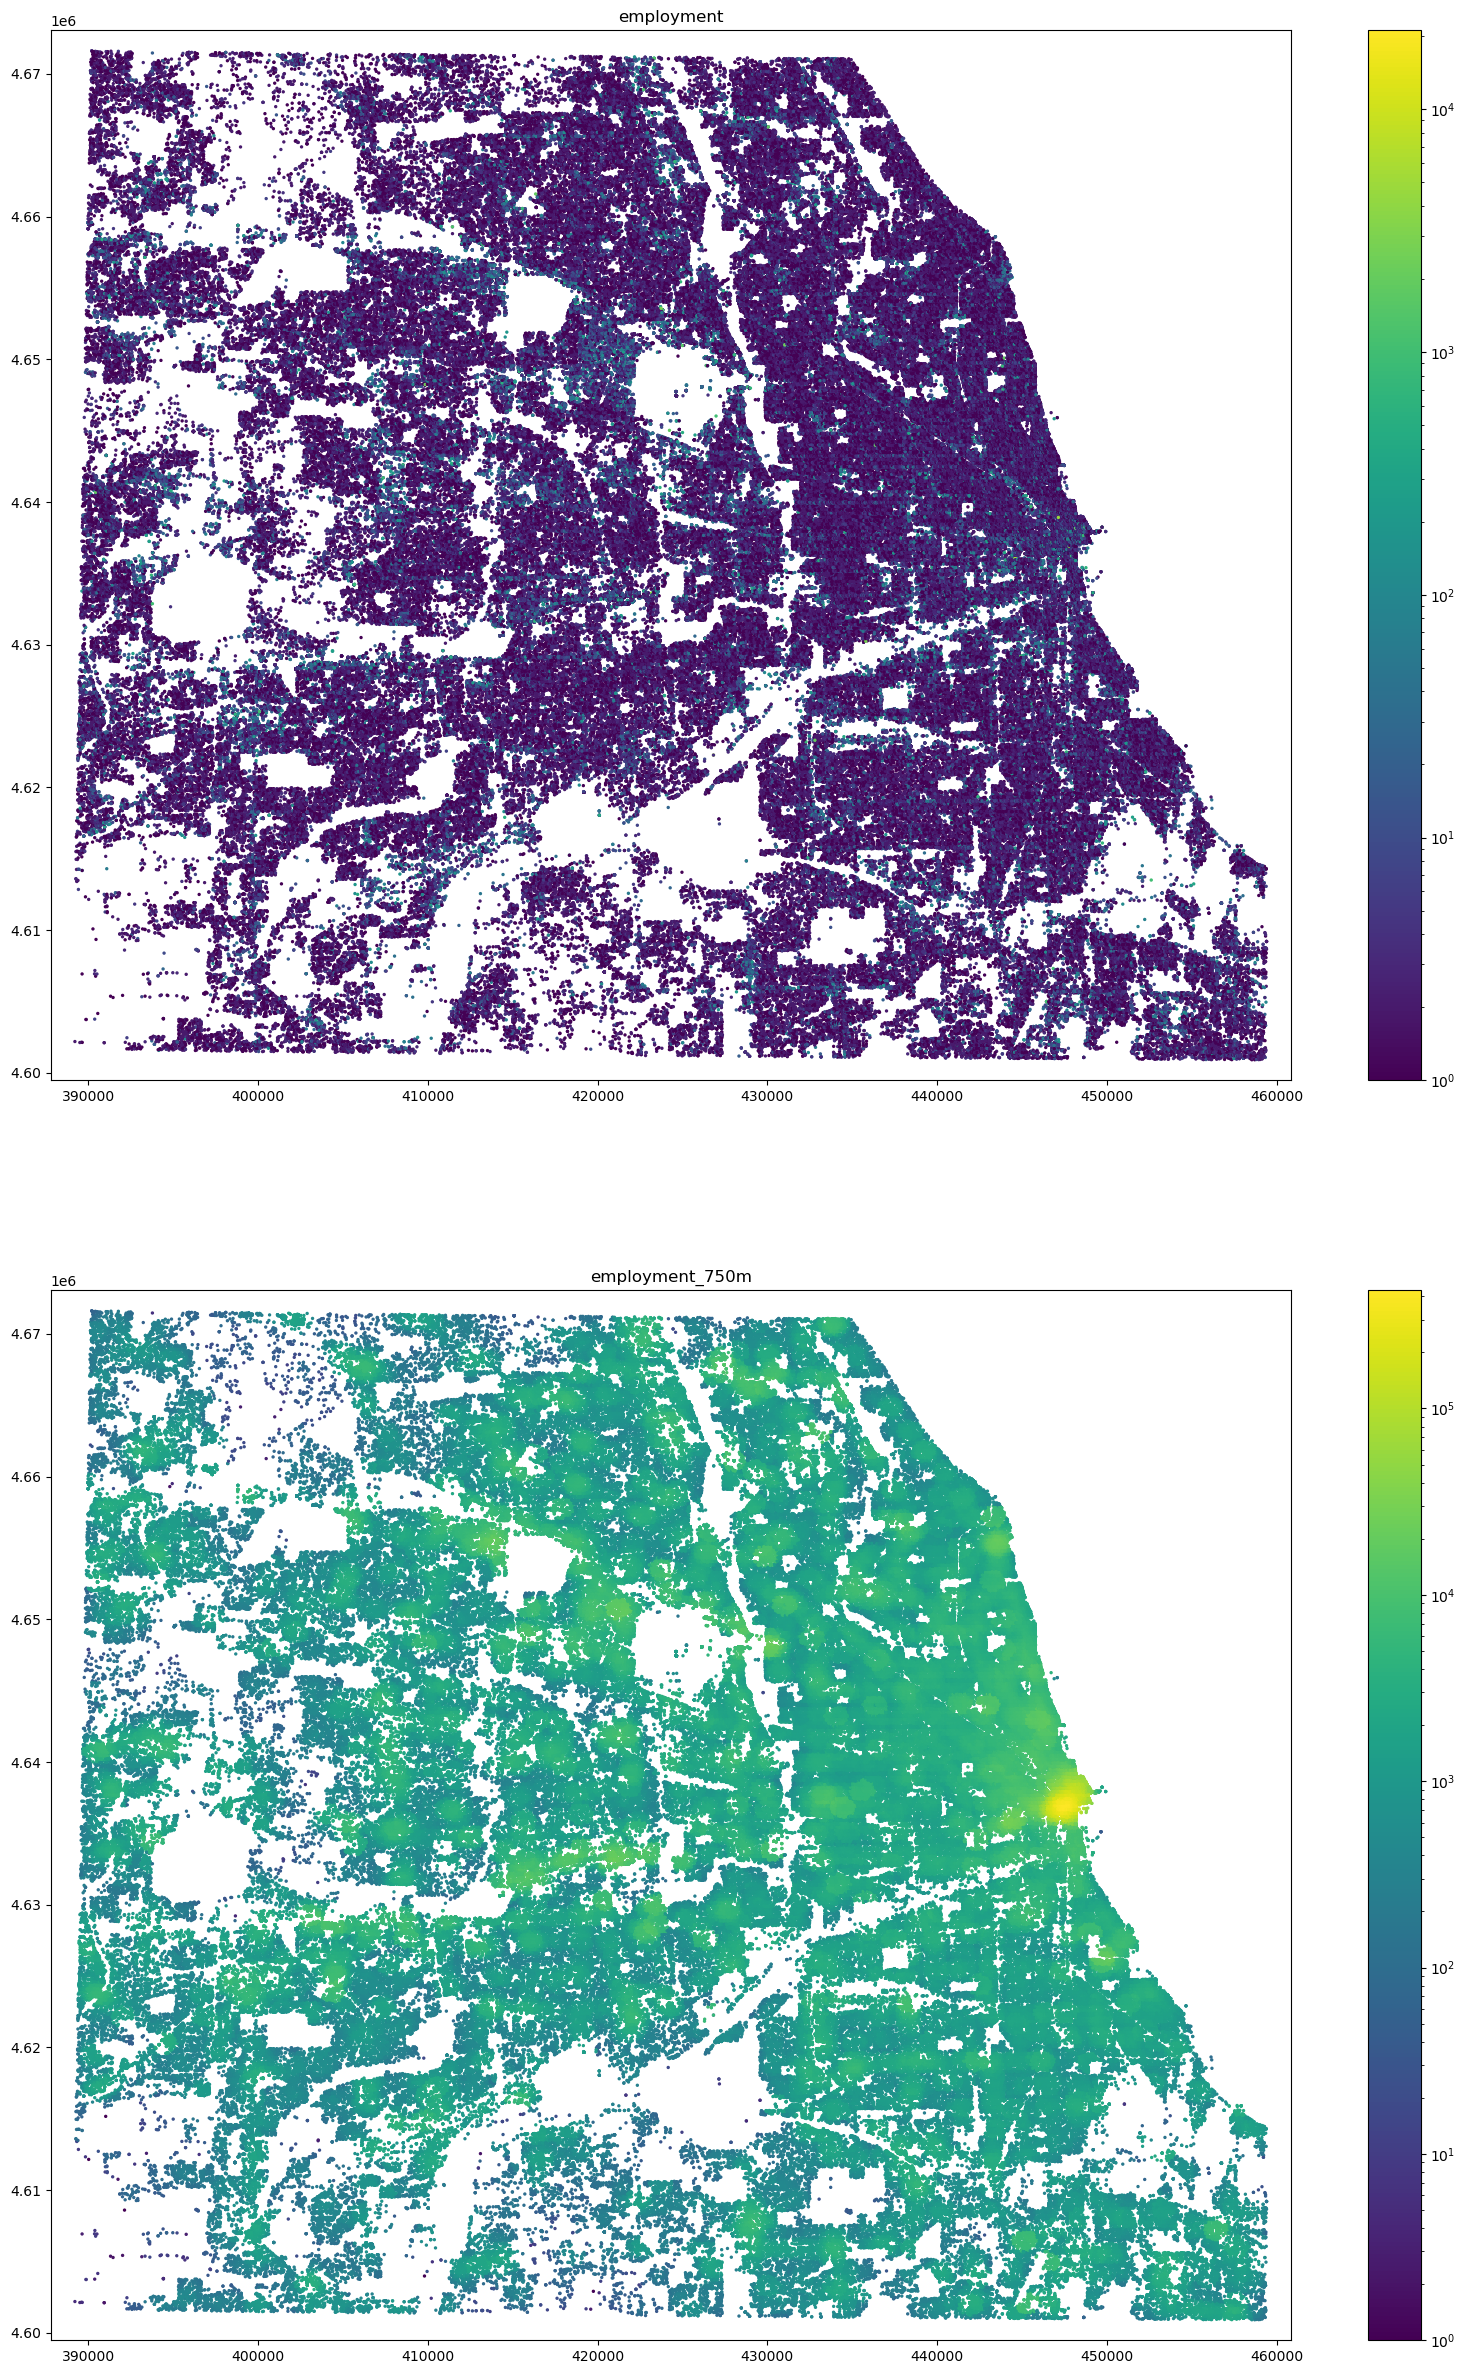

In [9]:
%load_ext autoreload
%autoreload
import numpy as np
from pandas import read_csv
from primelocations.main import detect_clusters, radius_search, Grid
from primelocations.testing.test_performance import analyze_func_perf

import matplotlib.pyplot as plt 
def convert_coords_to_local_crs(
        pts_df,
        x_coord_name:str='lon',
        y_coord_name:str='lat',
        initial_crs:str="EPSG:4326",
):
    
    # https://gis.stackexchange.com/a/269552
    
    import math
    from pyproj import Transformer
    # convert_wgs_to_utm function, see https://stackoverflow.com/a/40140326/4556479
    def convert_wgs_to_utm(lon: float, lat: float):
        """Based on lat and lng, return best utm epsg-code"""
        utm_band = str((math.floor((lon + 180) / 6 ) % 60) + 1)
        if len(utm_band) == 1:
            utm_band = '0'+utm_band
        if lat >= 0:
            epsg_code = '326' + utm_band
            return epsg_code
        epsg_code = '327' + utm_band
        return epsg_code
        
    # Get best UTM Zone SRID/EPSG Code for center coordinate pair
    utm_code = convert_wgs_to_utm(*pts_df[[x_coord_name,y_coord_name]].mean(axis=0))
    # define project_from_to with iteration
    # see https://gis.stackexchange.com/a/127432/33092
    local_crs = 'EPSG:'+str(utm_code)
    transformer = Transformer.from_crs(crs_from=initial_crs, crs_to=local_crs, always_xy=True)
    pts_df[x_coord_name],pts_df[y_coord_name] = transformer.transform(pts_df[x_coord_name], pts_df[y_coord_name])
    # print('Converted coords from '+initial_crs+' to '+local_crs+'.')
pts_df = read_csv('../../cbsa_sample_data/plants_16980.txt', sep=",", header=None)#[200:20000]
# pts_df = read_csv('../../cbsa_sample_data/plants_10180.txt', sep=",",header=None)
pts_df.columns = ["eid", "employment", "industry", "lat","lon","moved"]
convert_coords_to_local_crs(pts_df)
from primelocations.main import radius_search

grid = radius_search(
    pts_df=pts_df, 
    radius=750, 
    sum_names=['employment'],
    plot_radius_sums={'figsize':(20,30), 'cmap': 'viridis'},
    # plot_cell_reg_assign={},
    # plot_offset_checks={},
    # plot_offset_regions={},
    # plot_offset_raster={},
    # plot_pt_disk={},
    silent=True
)
# grid.plot_grid()


In [ ]:
pts_df.describe()

eid    employment       industry           lat            lon  \
count  1.980000e+04  19800.000000   19800.000000  1.980000e+04   19800.000000   
mean   2.858436e+08      9.314646  537447.369848  4.637686e+06  429002.525644   
std    3.496458e+08     76.991438  148340.957734  1.657164e+04   17008.949477   
min    1.100564e+06      1.000000     221.000000  4.600984e+06  389357.547707   
25%    3.141037e+07      1.000000  459420.000000  4.626187e+06  416022.673532   
50%    7.888290e+07      2.000000  541512.000000  4.637803e+06  432944.731311   
75%    6.206419e+08      4.000000  611110.000000  4.649814e+06  443875.788776   
max    9.699701e+08   8300.000000  928120.000000  4.671505e+06  459412.169780   

              moved          id_y          id_x      offset_x      offset_y  \
count  19800.000000  19800.000000  19800.000000  19800.000000  19800.000000   
mean    8795.185808    145.730455    157.337172      0.002047     -0.005192   
std     2858.368869     65.818664     67.554421      0.290504      0.289772   
min     1990.000000      0.000000      0.000000     -0.503578     -0.503529   
25%     9999.000000    100.000000    106.000000     -0.250243     -0.254170   
50%     9999.000000    146.000000    173.000000      0.002632     -0.011148   
75%     9999.000000    194.000000    216.000000      0.253890      0.244337   
max     9999.000000    280.000000    278.000000      0.503553      0.503532   

       micro_raster_x  micro_raster_y   triangle_id  region_comb_nr  \
count    19800.000000    19800.000000  19800.000000    19800.000000   
mean         0.108434       -0.221061      4.554394      168.270152   
std         13.682979       13.638288      2.293917      113.895594   
min        -28.000000      -28.000000      1.000000        0.000000   
25%         -8.000000       -8.000000      3.000000       71.000000   
50%          1.000000       -1.000000      5.000000      171.000000   
75%          8.000000        8.000000      7.000000      272.000000   
max         28.000000       28.000000      8.000000      400.000000   

        cell_region  employment_750m  
count  19800.000000     19800.000000  
mean   35484.943384       871.832525  
std    21980.025750      2705.061528  
min        0.000000         0.000000  
25%    18025.000000        27.000000  
50%    37054.000000        74.000000  
75%    56083.000000       207.000000  
max    76116.000000     15980.000000

In [ ]:
grid

name other 0.0 0.0 i 3 grps 26
name create_auto_grid_for_radius_search-gen_weak_order_rel_to_convex_set 3.3124953125 0.19013507860841017 i 3 grps 26
name create_auto_grid_for_radius_search-set_source-assign_points_to_cells 5.1093703125 0.29327453606975173 i 3 grps 26
name create_auto_grid_for_radius_search-set_target-__init__ 3.6093609375 0.20717497259181028 i 3 grps 26
name create_auto_grid_for_radius_search-set_target-aggregate_point_data_to_cells 4.5156203125 0.25919367186513453 i 3 grps 26
name create_auto_grid_for_radius_search-set_target-set_source-assign_points_to_mirco_regions 0.3124953125 0.017937027890344286 i 3 grps 26
name create_auto_grid_for_radius_search-update_search_params 0.2812453125 0.01614329819536443 i 3 grps 26
name create_auto_grid_for_radius_search-add_attributes_to_tree 3.4687359375 0.19910318896440096 i 2 grps 20
name create_auto_grid_for_radius_search-assign_points_to_cells 5.1093703125 0.29327453606975173 i 2 grps 20
name create_auto_grid_for_radius_search-

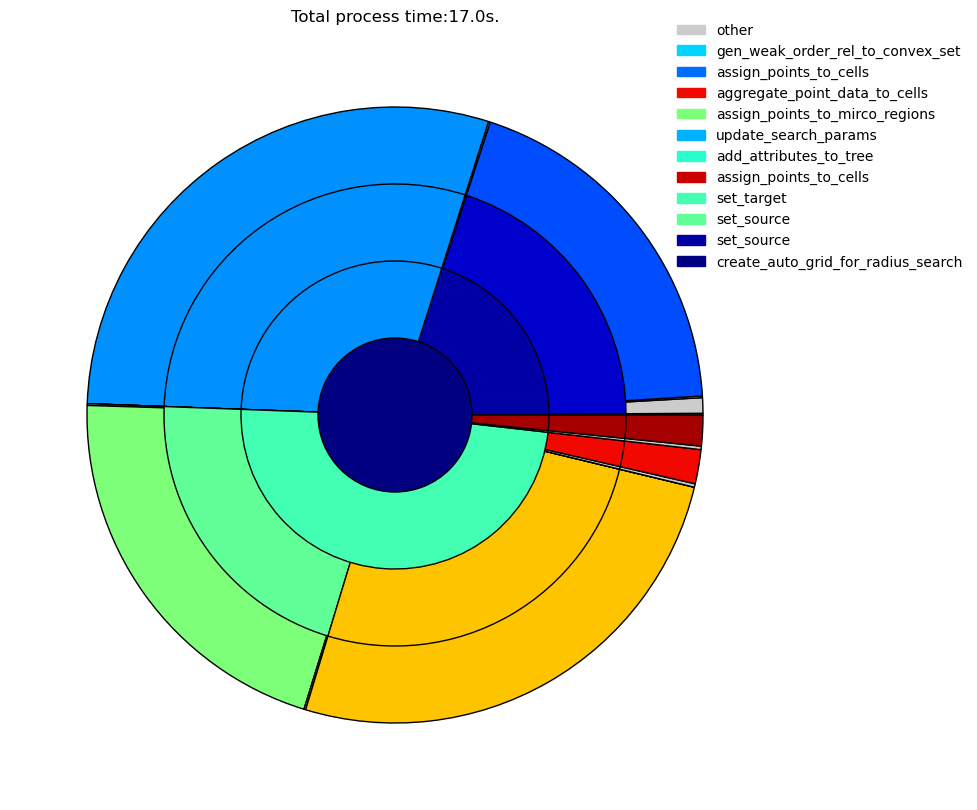

In [6]:
perf_analysis = analyze_func_perf(plot=True)

2

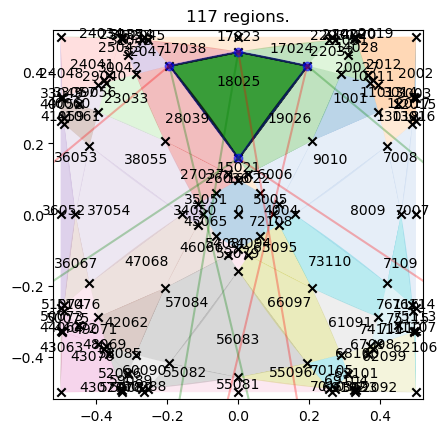

In [10]:
reg_id = 18025
regions = list(grid.search.id_to_offset_regions.values())
fig, ax = plt.subplots()
regions[0].plot_many(regions,ax=ax, x_lim=(-0.52,0.52), y_lim=(-0.52,0.52))
grid.search.id_to_offset_regions[reg_id].plot_single(ax=ax, x_lim=(-0.52,0.52), y_lim=(-0.52,0.52))
grid.search.id_to_offset_regions[reg_id].trgl_nr


<Axes: >

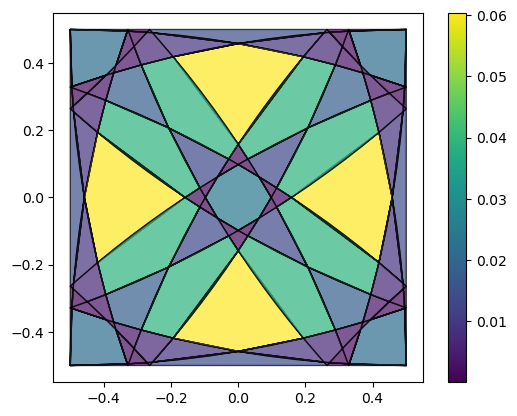

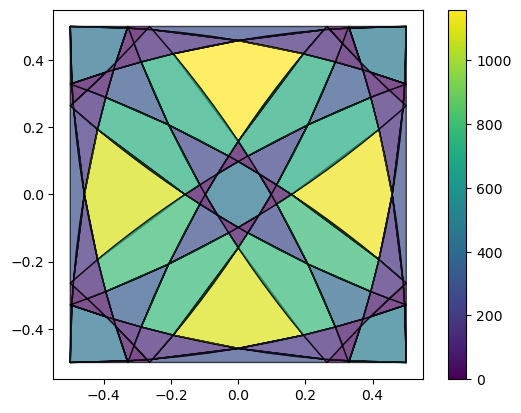

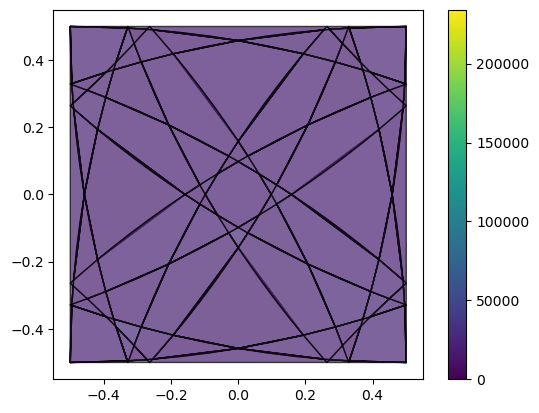

In [5]:
import geopandas as gpd
from shapely.geometry import Polygon
ns = []
geoms = []
total_area = 0
areas = []
n_pts = []
densities = []
for k,v in grid.search.id_to_offset_regions.items():
    area = v.calc_area(100)
    areas.append(area)
    n = sum(pts_df['cell_region']==k)
    n_pts.append(n)
    densities.append(n/area)
    total_area += area
    ns.append((n, k, v.trgl_nr, round(area*10000)))
    
    geoms.append(Polygon(v.get_plot_coords(1)))
ns.sort(key = lambda x: x[0])
df = gpd.GeoDataFrame({'areas':areas, 'n_pts':n_pts, 'densities':densities}, geometry=geoms)
df.plot('areas',cmap='viridis', edgecolor='black', alpha=0.7, legend=True)
df.plot('n_pts',cmap='viridis', edgecolor='black', alpha=0.7, legend=True)
df.plot('densities',cmap='viridis', edgecolor='black', alpha=0.7, legend=True)

In [4]:
import geopandas as gpd
from shapely.geometry import Point
df = gpd.GeoDataFrame({'cell_region':pts_df['cell_region'], 'triangle_id':pts_df['triangle_id']},geometry=[Point(c) for c in pts_df[['offset_x', 'offset_y']].values])
fig, ax = plt.subplots(figsize=(10,10))

df.plot('cell_region', ax=ax, cmap='tab20', s=1.8, legend=True)
list(grid.search.id_to_offset_regions.values())[0].plot_many(
    regions=list(grid.search.id_to_offset_regions.values()),
    facecolor='None', edgecolor='black', add_idxs=False, ax=ax, x_lim=(-0.52,0.52), y_lim=(-0.52,0.52))


KeyError: "None of [Index(['offset_x', 'offset_y'], dtype='object')] are in the [columns]"

In [4]:
def check_orienation(points:list):
    signedArea = 0
    n = len(points)
    for i in range(n):
        x1 = points[i][0]
        y1 = points[i][1]
        x2 = points[(i+1)%n][0]
        y2 = points[(i+1)%n][1]
        signedArea += (x1 * y2 - x2 * y1)
    return signedArea / 2

Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)
Axes(0.547727,0.11;0.352273x0.35)


Text(0.5, 1.0, 'id_y')

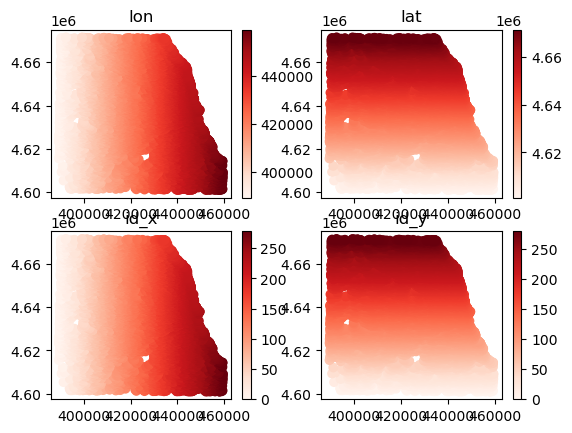

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
print(axs.flat[0])
sc = axs.flat[0].scatter(x=pts_df['lon'],y=pts_df['lat'],c=pts_df['lon'],cmap='Reds')
plt.colorbar(sc)
axs.flat[0].set_title("lon")
print(axs.flat[1])
sc = axs.flat[1].scatter(x=pts_df['lon'],y=pts_df['lat'],c=pts_df['lat'],cmap='Reds')
plt.colorbar(sc)
axs.flat[1].set_title("lat")
print(axs.flat[2])
sc = axs.flat[2].scatter(x=pts_df['lon'],y=pts_df['lat'],c=pts_df['id_x'],cmap='Reds')
plt.colorbar(sc)
axs.flat[2].set_title("id_x")
print(axs.flat[3])
sc = axs.flat[3].scatter(x=pts_df['lon'],y=pts_df['lat'],c=pts_df['id_y'],cmap='Reds')
plt.colorbar(sc)
axs.flat[3].set_title("id_y")

### Read in grid

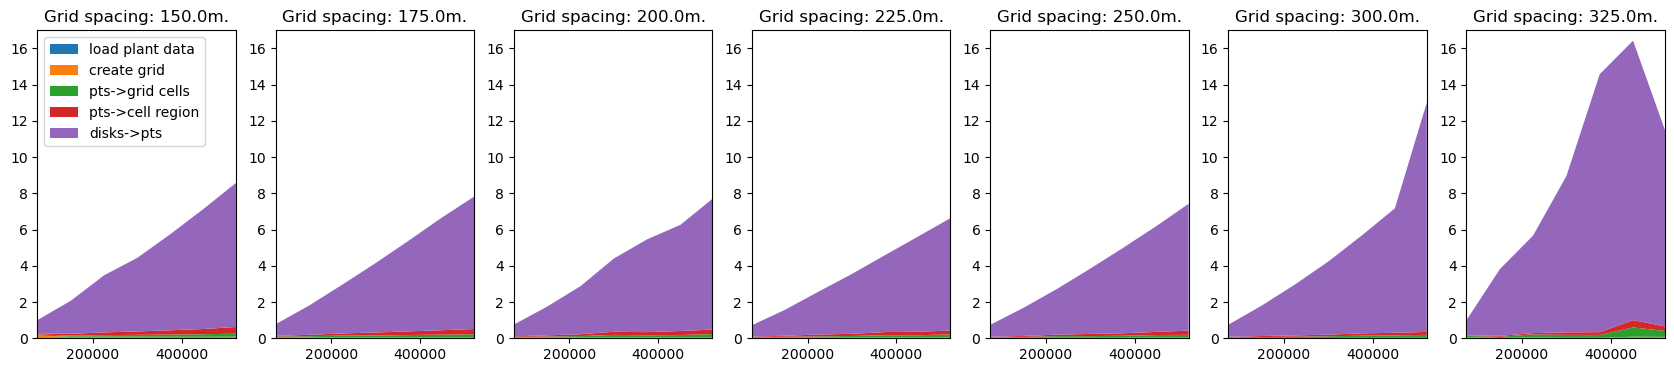

In [ ]:
n_rows, n_cols =1,len(df_timer_dict['nested']['grid_spacing'].circle_2s())
col_max = 6
ymax = max([
    math.ceil(max([(df_timer_i.loc[:,i]-df_timer_i.loc[:,0]).apply(lambda x: x.total_seconds()/60).max() 
    for i in range(1,len(df_timer_i.columns)-4) if i in range(6)])) for df_timer_i in df_timer_dict['nested']['grid_spacing'].values()
])
xmin = min([min(df_timer_i['n_points']) for df_timer_i in df_timer_dict['nested']['grid_spacing'].values()])
xmax = max([max(df_timer_i['n_points']) for df_timer_i in df_timer_dict['nested']['grid_spacing'].values()])
fig,axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols,4*n_rows))
for n, (circle_2,df_timer_i) in enumerate(df_timer_dict['nested']['grid_spacing'].items()):
    axs.flat[n].stackplot(
    df_timer_i['n_points'],*[(df_timer_i.loc[:,i]-df_timer_i.loc[:,i-1]).apply(lambda x: x.total_seconds()/60) for i in range(1,len(df_timer_i.columns)-4) if i in range(col_max)],
    )
    axs.flat[n].set_title('Grid spacing: '+str(round(circle_2*100000,0))+'m.') 

    axs.flat[n].set_xlim(xmin,xmax)
    axs.flat[n].set_ylim(0,ymax)
    if n==0:
        axs.flat[n].legend(loc="upper left", labels=['load plant data', 'create grid', 'pts->grid cells', 'pts->cell region', 'disks->pts'],prop={'size': 10})

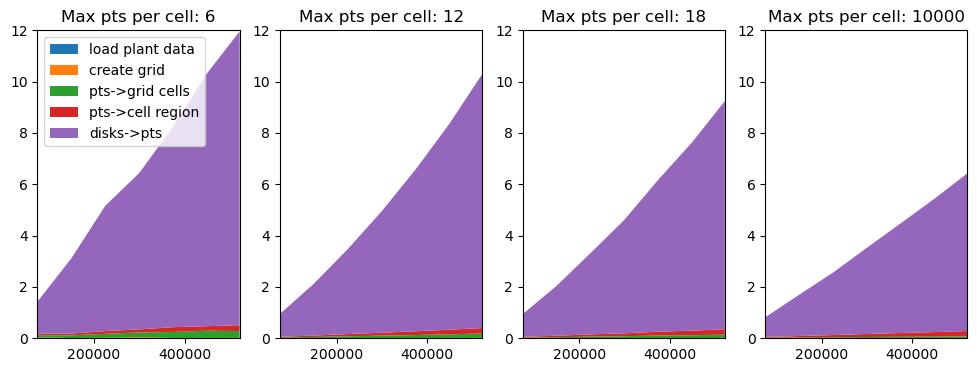

In [ ]:
n_rows, n_cols =1,len(df_timer_dict['nested']['max_pts_per_cell'].circle_2s())
col_max = 6
ymax = max([
    math.ceil(max([(df_timer_i.loc[:,i]-df_timer_i.loc[:,0]).apply(lambda x: x.total_seconds()/60).max() 
    for i in range(1,len(df_timer_i.columns)-4) if i in range(6)])) for df_timer_i in df_timer_dict['nested']['max_pts_per_cell'].values()
])
xmin = min([min(df_timer_i['n_points']) for df_timer_i in df_timer_dict['nested']['max_pts_per_cell'].values()])
xmax = max([max(df_timer_i['n_points']) for df_timer_i in df_timer_dict['nested']['max_pts_per_cell'].values()])
fig,axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols,4*n_rows))
for n, (circle_2,df_timer_i) in enumerate(df_timer_dict['nested']['max_pts_per_cell'].items()):
    axs.flat[n].stackplot(
    df_timer_i['n_points'],*[(df_timer_i.loc[:,i]-df_timer_i.loc[:,i-1]).apply(lambda x: x.total_seconds()/60) for i in range(1,len(df_timer_i.columns)-4) if i in range(col_max)],
    )
    axs.flat[n].set_title('Max pts per cell: '+str(round(circle_2))) 

    axs.flat[n].set_xlim(xmin,xmax)
    axs.flat[n].set_ylim(0,ymax)
    if n==0:
        axs.flat[n].legend(loc="upper left", labels=['load plant data', 'create grid', 'pts->grid cells', 'pts->cell region', 'disks->pts'],prop={'size': 10})

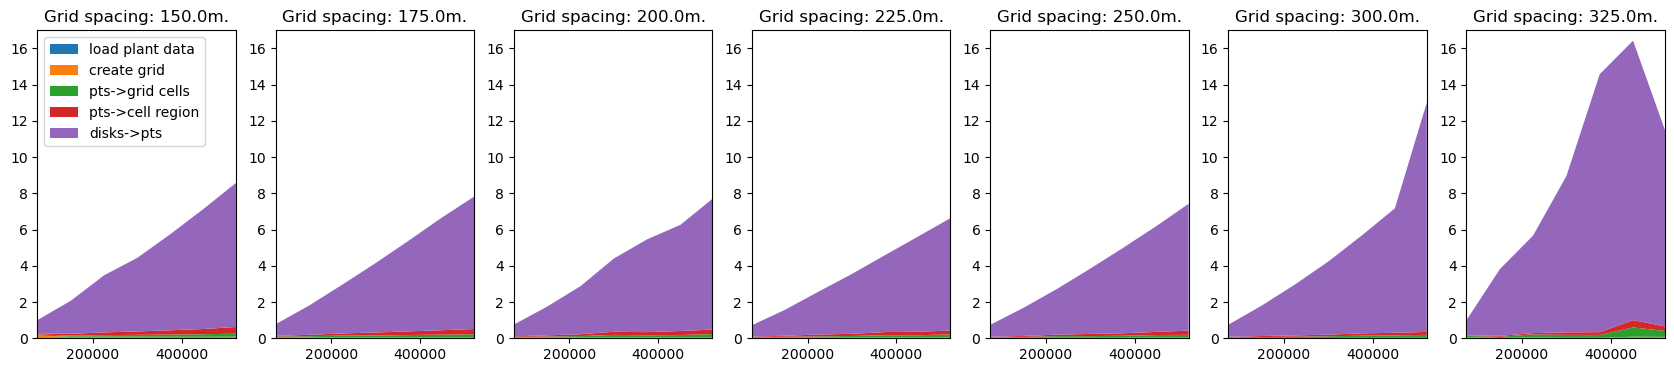

In [ ]:
n_rows, n_cols =1,len(df_timer_dict['nested']['grid_spacing'].circle_2s())
col_max = 6
ymax = max([
    math.ceil(max([(df_timer_i.loc[:,i]-df_timer_i.loc[:,0]).apply(lambda x: x.total_seconds()/60).max() 
    for i in range(1,len(df_timer_i.columns)-4) if i in range(6)])) for df_timer_i in df_timer_dict['nested']['grid_spacing'].values()
])
xmin = min([min(df_timer_i['n_points']) for df_timer_i in df_timer_dict['nested']['grid_spacing'].values()])
xmax = max([max(df_timer_i['n_points']) for df_timer_i in df_timer_dict['nested']['grid_spacing'].values()])
fig,axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols,4*n_rows))
for n, (circle_2,df_timer_i) in enumerate(df_timer_dict['nested']['grid_spacing'].items()):
    axs.flat[n].stackplot(
    df_timer_i['n_points'],*[(df_timer_i.loc[:,i]-df_timer_i.loc[:,i-1]).apply(lambda x: x.total_seconds()/60) for i in range(1,len(df_timer_i.columns)-4) if i in range(col_max)],
    )
    axs.flat[n].set_title('Grid spacing: '+str(round(circle_2*100000,0))+'m.') 

    axs.flat[n].set_xlim(xmin,xmax)
    axs.flat[n].set_ylim(0,ymax)
    if n==0:
        axs.flat[n].legend(loc="upper left", labels=['load plant data', 'create grid', 'pts->grid cells', 'pts->cell region', 'disks->pts'],prop={'size': 10})

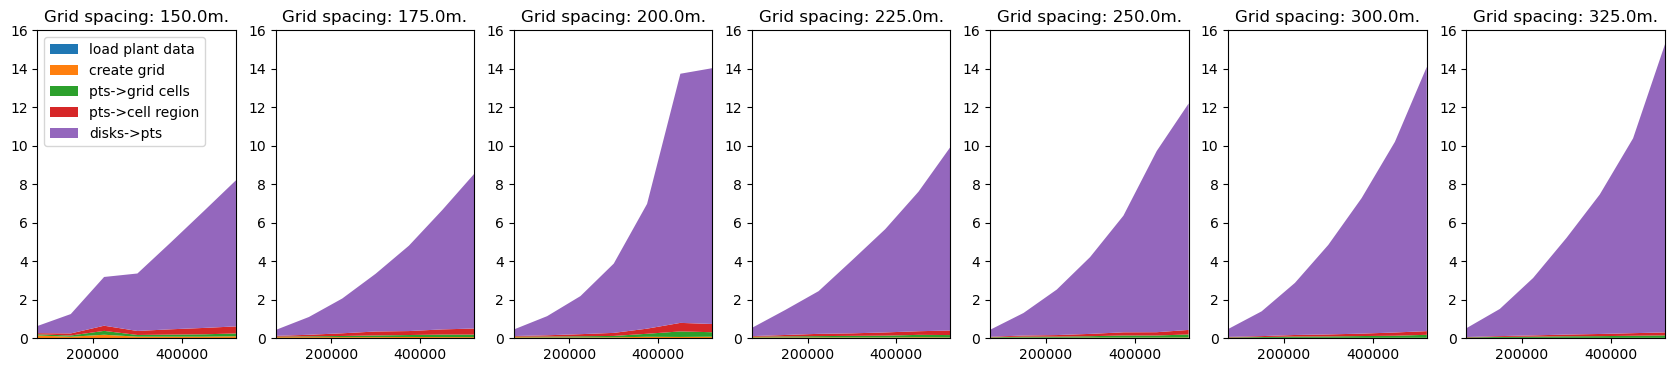

In [ ]:
n_rows, n_cols =1,len(df_timer_dict['vec']['grid_spacing'].circle_2s())
col_max = 6
ymax = max([
    math.ceil(max([(df_timer_i.loc[:,i]-df_timer_i.loc[:,0]).apply(lambda x: x.total_seconds()/60).max() 
    for i in range(1,len(df_timer_i.columns)-4) if i in range(6)])) for df_timer_i in df_timer_dict['vec']['grid_spacing'].values()
])
xmin = min([min(df_timer_i['n_points']) for df_timer_i in df_timer_dict['vec']['grid_spacing'].values()])
xmax = max([max(df_timer_i['n_points']) for df_timer_i in df_timer_dict['vec']['grid_spacing'].values()])
fig,axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols,4*n_rows))
for n, (circle_2,df_timer_i) in enumerate(df_timer_dict['vec']['grid_spacing'].items()):
    axs.flat[n].stackplot(
    df_timer_i['n_points'],*[(df_timer_i.loc[:,i]-df_timer_i.loc[:,i-1]).apply(lambda x: x.total_seconds()/60) for i in range(1,len(df_timer_i.columns)-4) if i in range(col_max)],
    )
    axs.flat[n].set_title('Grid spacing: '+str(round(circle_2*100000,0))+'m.') 

    axs.flat[n].set_xlim(xmin,xmax)
    axs.flat[n].set_ylim(0,ymax)
    if n==0:
        axs.flat[n].legend(loc="upper left", labels=['load plant data', 'create grid', 'pts->grid cells', 'pts->cell region', 'disks->pts'],prop={'size': 10})

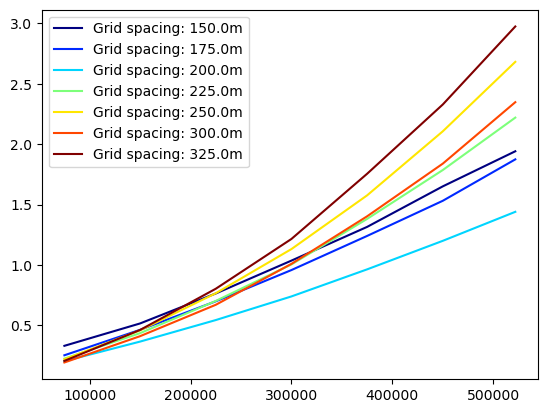

In [ ]:
fig,ax = plt.subplots()
for n,(circle_2,df_timer_i) in enumerate(df_timer_dict['grid_spacing'].items()):
    ax.plot(
    df_timer_i['n_points'],(df_timer_i.loc[:,5]-df_timer_i.loc[:,0]).apply(lambda x: x.total_seconds()/60),
    label = 'Grid spacing: '+str(round(circle_2*100000,0))+'m',
    color=plt.cm.jet(np.linspace(0,1,len(df_timer_dict['grid_spacing'].circle_2s())))[n]
    )
ax.legend()


# old results

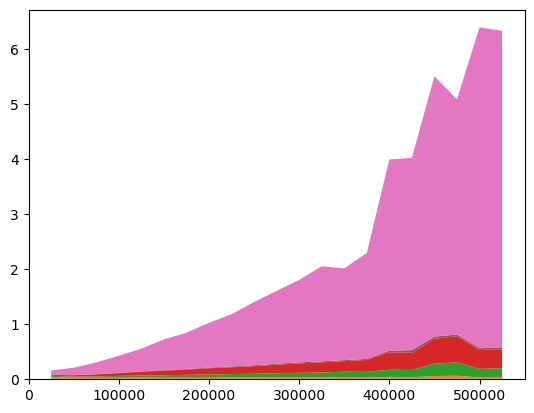

In [162]:
fig,ax = plt.subplots()
ax.stackplot(
    df_timer['n_points'],*[(df_timer.loc[:,i]-df_timer.loc[:,i-1]).apply(lambda x: x.total_seconds()/60) for i in range(1,len(df_timer.columns)-4) if i in range(8)],
    # colors=['green', 'red']
    )



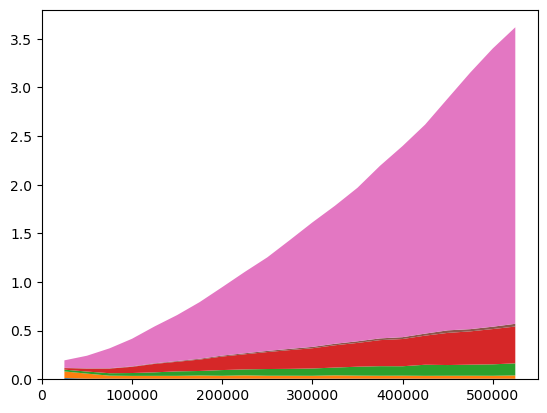

In [ ]:
fig,ax = plt.subplots()
ax.stackplot(
    df_timer['n_points'],*[(df_timer.loc[:,i]-df_timer.loc[:,i-1]).apply(lambda x: x.total_seconds()/60) for i in range(1,len(df_timer.columns)-4) if i in range(8)],
    # colors=['green', 'red']
    )



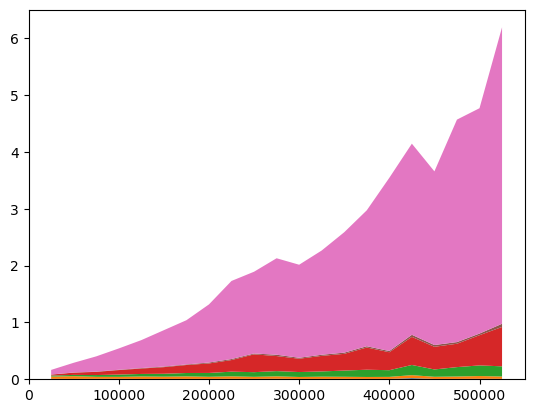

In [1212]:
# df_timer_unsorted_cell_regions = df_timer
fig,ax = plt.subplots()
ax.stackplot(
    df_timer_unsorted_cell_regions['n_points'],*[(df_timer_unsorted_cell_regions.loc[:,i]-df_timer_unsorted_cell_regions.loc[:,i-1]).apply(lambda x: x.total_seconds()/60) for i in range(1,len(df_timer_unsorted_cell_regions.columns)-4) if i in range(8)],
    # colors=['green', 'red']
    )



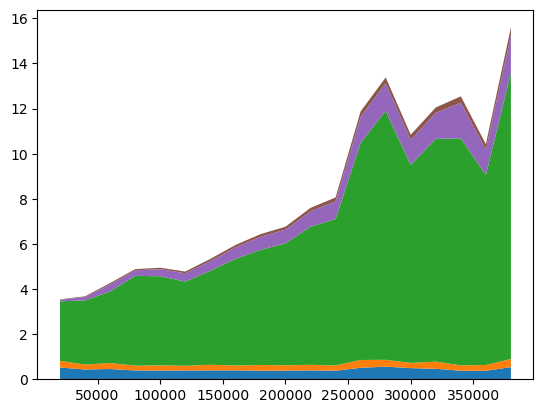

In [ ]:
fig,ax = plt.subplots()
ax.stackplot(
    df_timer['n_points'],*[(df_timer.loc[:,i]-df_timer.loc[:,i-1]).apply(lambda x: x.total_seconds()) for i in range(1,len(df_timer.columns)-4)],
    # colors=['green', 'red']
    )


N Pts: 609 in 35 cells.
max_nest_level 4


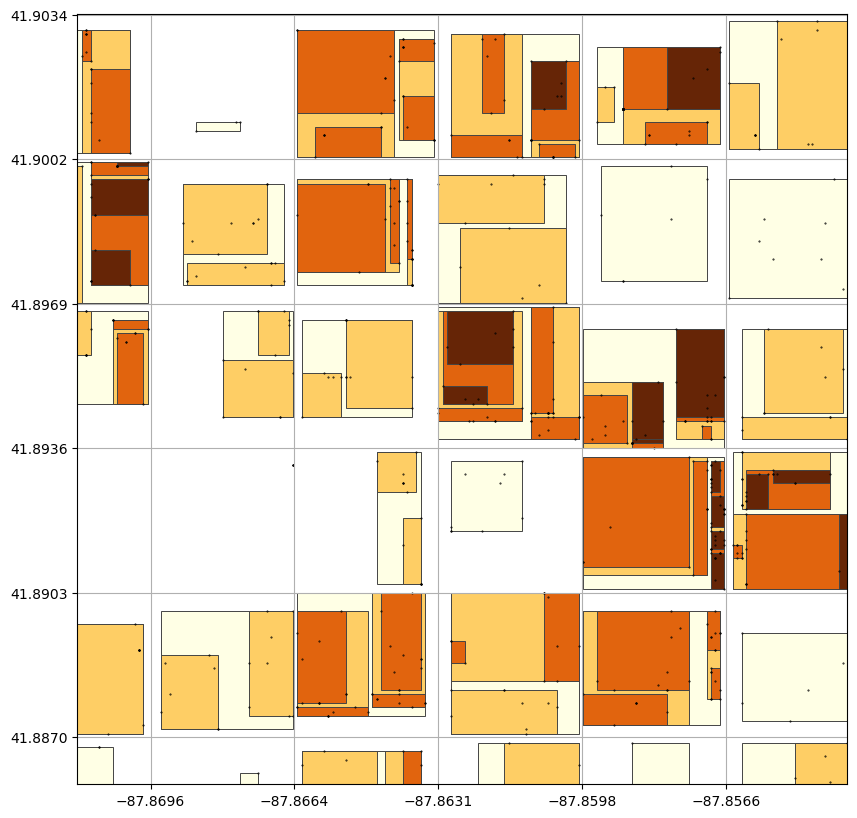

In [ ]:
illustrate_nested_grid(
        grid=grid,
        pts_lat_lon=plant_data[['lat','lon']].values,
        cell_ids=plant_data['cell_id'],
        lat_min=plant_data['lat'].mean()-0.0025,
        lat_max=plant_data['lat'].mean()+0.015,
        lon_min=plant_data['lon'].mean()-0.015,
        lon_max=plant_data['lon'].mean()+0.0025,
)
